### Levenshtein(edit) distance를 이용한 한국어 단어의 형태적 유사성
- https://lovit.github.io/nlp/2018/08/28/levenshtein_hangle/
- https://madplay.github.io/post/levenshtein-distance-edit-distance

- **`string distance`** : 단어, 혹은 문장과 같은 string 간의 '형태적 유사성'을 정의하는 방법 

        < String distance >
        - 단어 간 거리는 형태적 거리와 의미적 거리로 분류됨
        - 의미적 거리는 word embedding 과 같은 방법으로 학습
        - 즉, string의 형태적인 거리를 정의하는 방법을 string distance라고 함  
        
        < String distacne metric>
       - jaro-winkler, levenshtein과 같이 string을 이용하여 정의되는 metrics
       - Hamming, Cosine, TF-IDF distance 같이 string을 vector로 표현한 다음 거리를 정의하는 방법
        
- **`Word Embedding`** : 

        < 대표적 Word Embedding >
          ·Word2Vec : 단어 간 의미적 유사성(거리)를 벡터로 표현
                       두 단어의 형태적 유사성은 없음
                       2글자나 5글자 사이에 공통된 음절이 존재하지 않음

- **`Edit distance`** : 대표적인 string distance metric 중 하나로 Levenshtein distance 라고 함(`편집거리 알고리즘`)
        
        <Levenshtein distance 방법>
       - Levenshtein distance는 대표적인 metric로 이 방법의 별명은 edit distance임
       - 한 string s1에서 다른 s2로 교정하는데 드는 최소 횟수를 두 string 간의 거리로 정의
       - 오탈자 교정에 자주 이용되며, 정자(right words)에 대한 사전이 존재한다면 정자가 아닌 단어들을 
         string distance 기준으로 가장 가까운 단어로 치환할 수 있음
         
        <Levenshtein distance>
        - 한국어처럼 각 글자가 요소들 (초/중/종성)로 이루어진 언어를 고려한 metric이 아님
        - 고로, 한글에 적합하도록 변형해야 함
        - 한 string s1을 s2로 변환하는 최소 횟수를 두 string 간의 거리로 정의함
        -> 문자열 s1이 s2와 같아지기 위해 몇 번의 연산을 해야하는가?(`삽입 Insertion`, `삭제 Deletion`, `대체 Replacement`)
         
         예) s1 ='꿈을꾸는아이' 에서 s2='아이오아이'로 바뀌기 위해서는 '꿈을꾸->아이오'로 바꾸고,
         네번째 글자 '는'이 제거되면 됨
         
        - Levenshtein distance에서는 이처럼 string을 변화하기 위한 edit 방법을 세 가지로 분류
        
        (1) delete : '점심을먹자 -> 점심먹자'로 바꾸기 위해서는 '을' 삭제
        (2) insert : '점심먹자 -> 점심을먹자' 로 바꾸기 위해서는 반대로 '을' 삽입
        (3) substitution : '점심먹자 -> 점심먹장' 로 바꾸기 위해서는 '자'를 '장'으로  치환
        
         위의 예시에서 s1='꿈을꾸는아이' 에서 s2='아이오아이'로 변환하는 방법은 다양함
         '꿈'을 지우고 '아'를 입력할 수도 있음. 그러나 이 비용은 2번의 수정(edit)임
         이보다는 '꿈'을 '아'로 변환하는 것이 1의 비용만 더 들기 때문에 더 쌈
         -> 이처럼 가장 적은 비용이 드는 수정 방법을 찾는 것이 'Levenshtein distance' 의 목표
         
        - 이를 위해서 동적 프로그래밍(Dynamic programming)이 이용됨
          : 전체 문제를 작은 문제의 집합으로 정의하고, 작은 문제를 반복적으로 풂으로써 전체 문제의 해결 방법을 찾음
          : Levenshtein은 dynamic programming의 연습용으로 자주 등장하는 예제
        
        
        
         

- '데이터마이닝 -> 데이타마닝' 으로 변환하는 예제를 통해 원리 파악하기

        (1) Levenshtein distance 계산을 위해서 len(s1) by len(s2)의 거리 행렬인 d를 생성함
        (2) 맨 윗줄을 0번째 row로, 그 아랫줄을 1 번째 row로 이야기함
        (3) d[0.0] 은 s1,s2의 첫 글자가 같으면 0, 아니면 1로 초기화함 
            -> 글자가 다르면 substitution cost가 발생한다는 의미임
        (4) 그 외의 d[0,j]에 대해서는 d[0,j] = d[0,j-1] +1 의 비용으로 초기화함
        (5) 한글자씩 insertion이 일어났다는 의미로, 이후에는 좌측, 상단, 좌상단의 값을 이용해서 거리 행렬 d 업데이트
        
         

### `의사 코드(Pseudo code)`


        int LevenshteinDistance(char s[1..m], char t[1..m])
        {
            declare int d[0..m, 0..n]
            clear all emenets in d // set each element to zero

            for i from 1 to m
                d[i, 0] := i

            for j from 1 to n
                d[0, j] := j

            for j from 1 to n
            {
                for i from 1 to m
                {
                    if s[i] = t[j] then d[i, j] := d[i-1, j-1]
                    else d[i, j] := minimum(d[i-1, j]+1, d[i, j-1]+1, d[i-1, j-1]+1)
                }
            }
            return d[m, n]
        }

## **deletion**

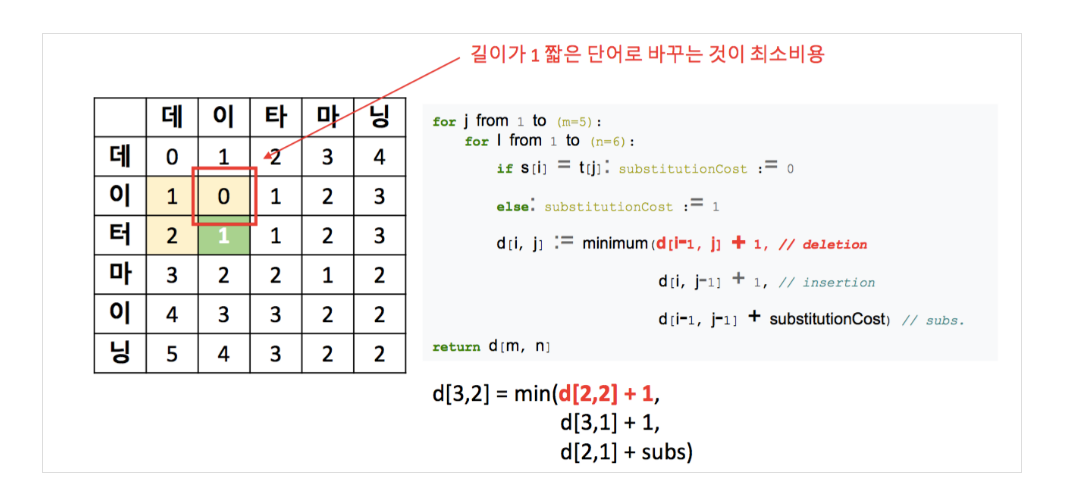

## **insertion**
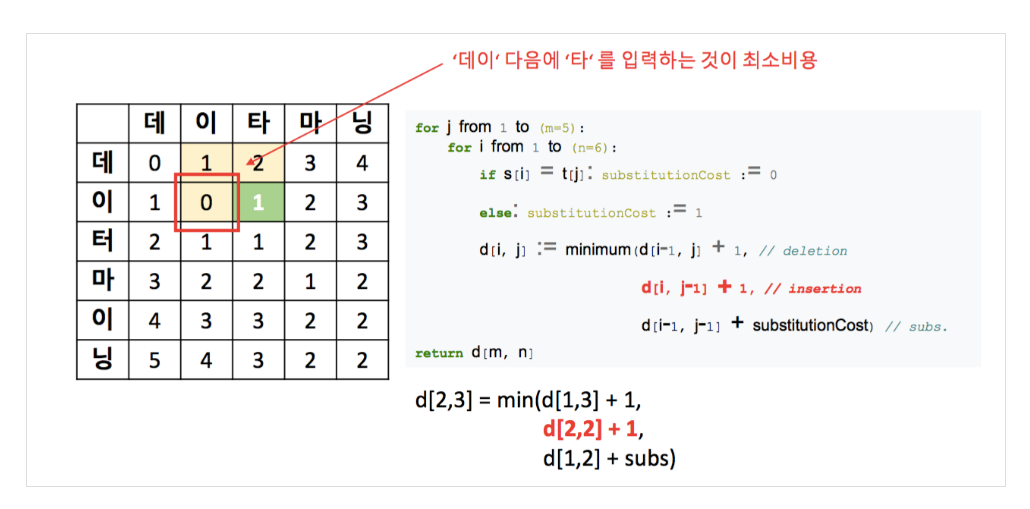

## **substitution**
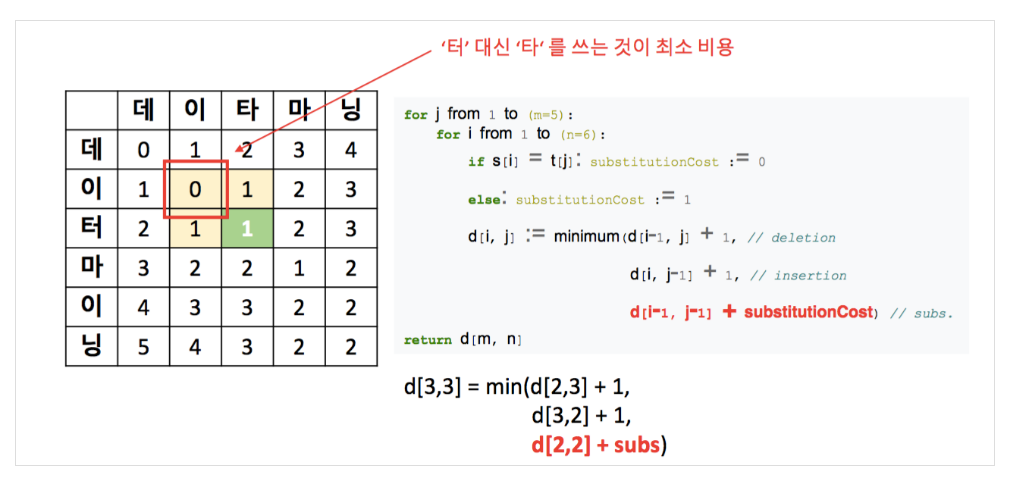

#### Levenshtein distance 구현


In [1]:
def levenshtein_distance(t1, t2):
    rows, columns = len(t1)+1, len(t2)+1
    matrix = [list(range(columns)) if not i else [i]+[0]*(columns-1) for i in range(rows)]
    
    for i in range(1, rows):
        for j in range(1, columns):
            if t1[i-1] == t2[j-1]:
                matrix[i][j] = matrix[i-1][j-1]
                
            else:
                matrix[i][j] = min(matrix[i-1][j], matrix[i][j-1], matrix[i-1][j-1],)+1
                
    
    for arr in matrix:
        print(arr)
    
    return matrix[rows-1][columns-1]

In [2]:
print(levenshtein_distance('doctor','bottle'))

[0, 1, 2, 3, 4, 5, 6]
[1, 1, 2, 3, 4, 5, 6]
[2, 2, 1, 2, 3, 4, 5]
[3, 3, 2, 2, 3, 4, 5]
[4, 4, 3, 2, 2, 3, 4]
[5, 5, 4, 3, 3, 3, 4]
[6, 6, 5, 4, 4, 4, 4]
4
